# Time Series Plot

Chart yang sumbu X-nya adalah variabel waktu.

## Line Plot

TimeSeries Plot biasanya menggunakan Line Chart/Line Plot. Jadi sebelum menuju TimeSeries Plot ada baiknya kita mengetahui bagaimana cara membuat Line Chart.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Buat data dummy
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
print(s)

[1.00000000e+00 1.06279052e+00 1.12533323e+00 1.18738131e+00
 1.24868989e+00 1.30901699e+00 1.36812455e+00 1.42577929e+00
 1.48175367e+00 1.53582679e+00 1.58778525e+00 1.63742399e+00
 1.68454711e+00 1.72896863e+00 1.77051324e+00 1.80901699e+00
 1.84432793e+00 1.87630668e+00 1.90482705e+00 1.92977649e+00
 1.95105652e+00 1.96858316e+00 1.98228725e+00 1.99211470e+00
 1.99802673e+00 2.00000000e+00 1.99802673e+00 1.99211470e+00
 1.98228725e+00 1.96858316e+00 1.95105652e+00 1.92977649e+00
 1.90482705e+00 1.87630668e+00 1.84432793e+00 1.80901699e+00
 1.77051324e+00 1.72896863e+00 1.68454711e+00 1.63742399e+00
 1.58778525e+00 1.53582679e+00 1.48175367e+00 1.42577929e+00
 1.36812455e+00 1.30901699e+00 1.24868989e+00 1.18738131e+00
 1.12533323e+00 1.06279052e+00 1.00000000e+00 9.37209480e-01
 8.74666766e-01 8.12618685e-01 7.51310113e-01 6.90983006e-01
 6.31875447e-01 5.74220708e-01 5.18246326e-01 4.64173205e-01
 4.12214748e-01 3.62576010e-01 3.15452894e-01 2.71031373e-01
 2.29486757e-01 1.909830

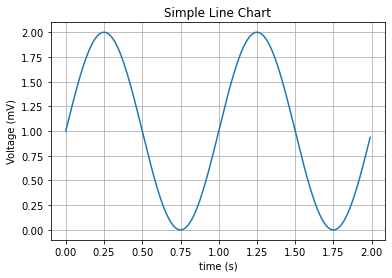

In [5]:
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='Voltage (mV)', title='Simple Line Chart')
ax.grid()
plt.show()

Example 2

In [8]:
np.random.seed(19680801)
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
r = np.exp(-t / 0.05)
print(r)

[1.00000000e+000 8.18730753e-001 6.70320046e-001 ... 4.82933739e-261
 3.95392704e-261 3.23720166e-261]


In [9]:
cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2
print(s1)
print(s2)

[ 0.00818823  0.01588678  0.02901919 ... -0.00951057 -0.00951057
 -0.00587785]
[-0.00949799  0.01342479  0.03917788 ... -0.00951057 -0.00951057
 -0.00587785]


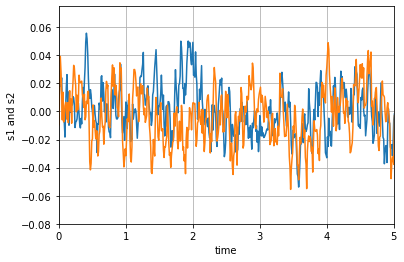

In [10]:
fig, ax = plt.subplots()
ax.plot(t, s1, t, s2)
ax.set_xlim(0, 5)
ax.set_xlabel('time')
ax.set_ylabel('s1 and s2')
ax.grid(True)
plt.show()

Example 3

In [19]:
import seaborn as sns

sns.set(style='darkgrid')

In [20]:
# Load dataset
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


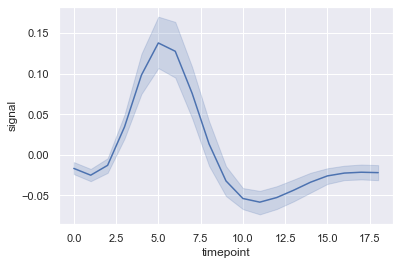

In [21]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

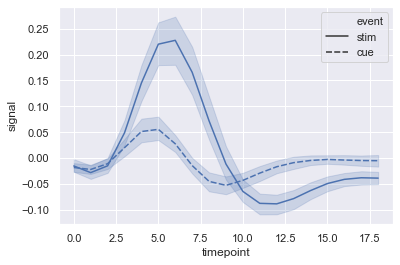

In [24]:
sns.lineplot(x='timepoint', y='signal', style='event', data=fmri)

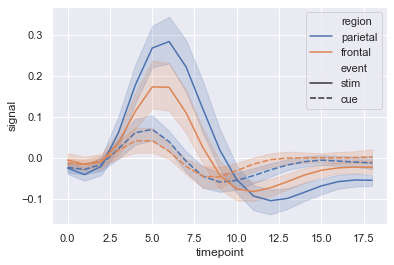

In [25]:
sns.lineplot(x='timepoint', y='signal', hue='region', style='event', data=fmri)

Example 4

In [26]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
print(values)

[[  0.16792113   0.52350518   0.81737553   1.70384552]
 [ -1.97902642   1.23770369   0.05723019   2.74326736]
 [ -2.94547836   1.09402466   1.62835461   2.35998788]
 ...
 [-20.16215347   9.46658006 -10.38886875  17.95576784]
 [-20.32296367   9.63655141  -7.97732518  19.39724181]
 [-20.76771621  11.01141408  -7.94147579  19.35811172]]


In [33]:
import pandas as pd

dates = pd.date_range('1 1 2016', periods=365, freq='D')
data = pd.DataFrame(values, dates, columns=['A', 'B', 'C', 'D'])
data.head()

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846
2016-01-02,-1.979026,1.237704,0.057230,2.743267
2016-01-03,-2.945478,1.094025,1.628355,2.359988
2016-01-04,-2.307479,0.749367,1.624072,2.518347
2016-01-05,-3.270573,0.333310,1.867085,2.866550


In [34]:
data = data.rolling(7).mean()

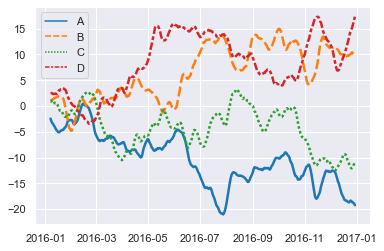

In [35]:
sns.lineplot(data=data, palette='tab10', linewidth=2.5)

Example 5

In [44]:
sns.set(style='dark')
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


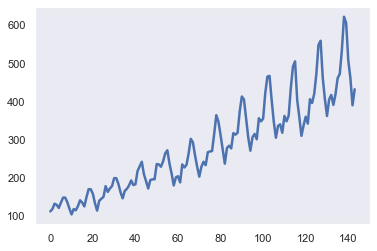

In [45]:
sns.lineplot(data=flights['passengers'], palette='tab10', linewidth=2.5)

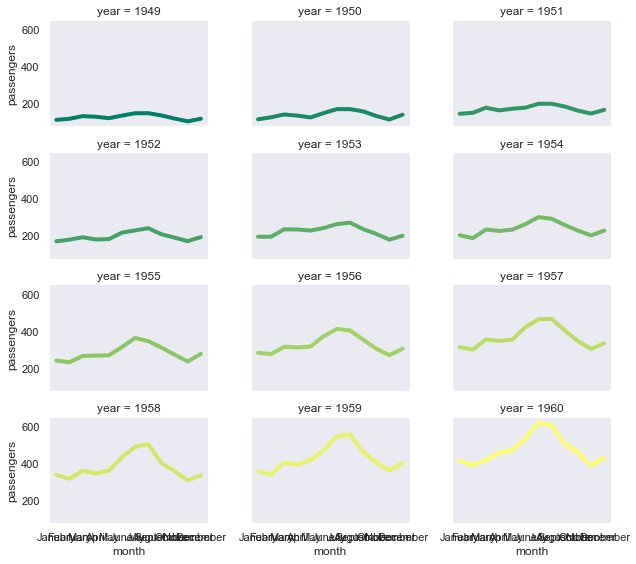

In [48]:
sns.relplot(data=flights,
            x='month', y='passengers', col='year', hue='year',
            kind='line', palette='summer', linewidth=4, zorder=5,
            col_wrap=3, height=2, aspect=1.5, legend=False,
            )

In [54]:
sns.FacetGrid(flights, col='month', row='passengers')